In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import os

/Users/jinxin/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


***

# Homework Assignment \#3

*due Thursday, March 6th, 2018 at 12.45pm*

### n.b.
All deliverables are required to be typed and all graphs and statistical output generated in Jupyter Notebook using Python and associated packages. Deliverables with *any* handwritten elements will not be accepted and will receive a grade of zero. 

You are required to upload a ```ipynb``` file to **Canvas** as the deliverable. Use the ```homework_03.ipynb``` file as a template and write the answers in text and include relevant code below each question. Print this document, double-sided, staple it, and hand it in on Thursday, March 6th, 2018, at 12.45pm at the beinning of class.  

### Question 1

*Preamble to Question #1*

In [2]:
faithfulData = sm.datasets.get_rdataset("faithful")
df_faithfulData = pd.DataFrame(faithfulData.data)

The `faithful` data set consists of the waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA. Regress `waiting` on `eruptions` and evalute the model in totality, i.e., evaluate the quality of the model, citing specific metrics, as well as validating necessary assumptions for the normal error regression model. Discuss, in detail, your approach and your evaluation of the model. Include all appropriate graphs *and*, if hypothesis tests are run, be certain to include all test details (null and alternative hypotheses, decision rules, $p$-values and conclusions).

In [3]:
df_faithfulData.head(5)

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [5]:
X = sm.add_constant(df_faithfulData.eruptions)
model = sm.OLS(df_faithfulData.waiting, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                waiting   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sun, 04 Mar 2018   Prob (F-statistic):          8.13e-100
Time:                        19:57:32   Log-Likelihood:                -868.38
No. Observations:                 272   AIC:                             1741.
Df Residuals:                     270   BIC:                             1748.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.4744      1.155     28.985      0.0

**Answer:**

`Model evaluation:` The model has $R^2$ and adjusted $R^2$ of 0.811, meaning 81% of the variation of $waiting$ can be explained by $eruptions$. The regression scatter plot looks reasonable. Both F-statistics and its associated p-value are good.

The coefficient of $eruptions$ is 10.73 and its p-value is 0.000, thus statistically speaking, the coefficient significantly different from zero. As eruption duration increases by 1, the waiting time between eruptions goes up by 10.73.

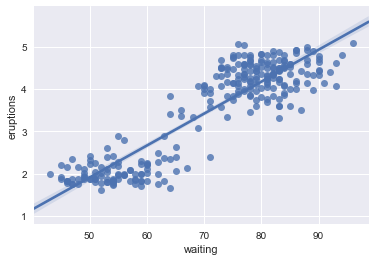

In [44]:
sns.regplot(df_faithfulData.waiting, df_faithfulData.eruptions)

`Assumption validation:`

1.First let's take a look at the residual plot. The mean of the errors is close to zero and errors are randomly scattered around zero.

-2.75335310107e-14


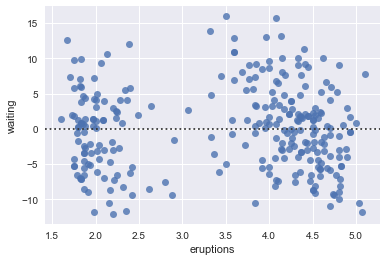

In [14]:
print(np.mean(results.resid))
sns.residplot(df_faithfulData.eruptions, df_faithfulData.waiting)

2.Homoscedasticity

let's run a Brown-Forsythe test to check for homoscedasticity. The median of $eruptions$ is 4, so we will split the data into two groups based on that.

$H_0: \sigma^2_{eruptions <= 4} = \sigma^2_{eruptions > 4}$

$H_1: \sigma^2_{eruptions <= 4} \neq \sigma^2_{eruptions > 4}$

We got a p-value of 0.22 which is greater than 0.05 or the 5% significance level. We don't have enough evidence to reject the null hypothesis. Given the data we have, we can conclude that variance of errors is constant, so homoscedasticity is not violated.

In [16]:
np.median(df_faithfulData.eruptions)

4.0

In [17]:
import scipy as sp
sample_1 = results.resid[df_faithfulData.eruptions <= 4.0]
sample_2 = results.resid[df_faithfulData.eruptions > 4.0]
sp.stats.levene(sample_1, sample_2, center = 'median')

LeveneResult(statistic=1.5169060118480575, pvalue=0.21915992095863476)

3.Normality

The errors look roughly normally distributed.

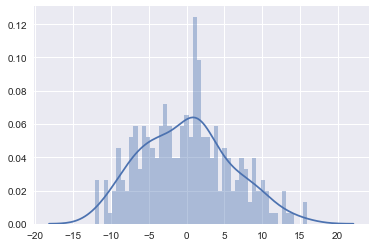

In [20]:
sns.distplot(results.resid, bins=50)

### Question 2

In 1987, Phillip Ein-Dor and Jacob Feldmesser estimated the relative performance (ERP, #10 in data dictionary) of CPUs in an academic journal paper using linear regression. Import `erpData.csv`, using `header = None` as there is no header in the file. The data dictionary follows:

1. Vendor Name
2. Model Name
3. MYCT: machine cycle time in nanoseconds (integer) 
4. MMIN: minimum main memory in kilobytes (integer) 
5. MMAX: maximum main memory in kilobytes (integer) 
6. CACH: cache memory in kilobytes (integer) 
7. CHMIN: minimum channels in units (integer) 
8. CHMAX: maximum channels in units (integer) 
9. PRP: published relative performance (integer) 
10. ERP: estimated relative performance from the original article (integer)

In [21]:
erp = pd.read_csv('erpData.csv', header=None)
erp.head(5)

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


(a) Create a correlation matrix or scatterplot matrix of variables 3-10. Identify three explanatory variables you believe would be good predictors of ERP.

**Answer:** From the correlation matrix, we can see the top 3 variables that are most correlated to ERP is variable 8, 4 and 3. Notice that these three variables are also highly correlated with each other, so we might run into the multicolinearity problem.

In [41]:
erp.loc[:, '2':'9'].corr()

,2,3,4,5,6,7,8,9
2,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
3,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
4,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
5,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
6,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
7,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
8,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
9,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


(b) Run three simple linear regression models: $X_1 \sim Y$, $X_2 \sim Y$, and $X_3 \sim Y$. Discuss the merits of each model with supporting evidence, and choose the model which you feel is the most appropriate in predicting ERP.
    
**Answer:** Based on the regression results below, PRP seems to be the most explanatory variable of ERP. However, we should figure out how PRP is derived before making the judgement. Other than that, MMIN is a pretty reasonable and explanatory variable.
    
Model 1

Adjusted $R^2$ of Model 1 is 0.934. 93.4% of the variation in ERP can be explained by PRP: published relative performance. The coefficient of PRP is also significantly different from zero.

In [33]:
X = sm.add_constant(erp.loc[:, 8])
model = sm.OLS(erp.loc[:, 9], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      9   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     2933.
Date:                Sun, 04 Mar 2018   Prob (F-statistic):          3.43e-124
Time:                        20:29:02   Log-Likelihood:                -1065.7
No. Observations:                 209   AIC:                             2135.
Df Residuals:                     207   BIC:                             2142.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1045      3.299      0.335      0.7

Model 2

Adjusted $R^2$ of Model 1 is 0.812. 81.2% of the variation in ERP can be explained by MMIN: minimum main memory in kilobytes. The coefficient of MMIN is also significantly different from zero.

In [34]:
X = sm.add_constant(erp.loc[:, 4])
model = sm.OLS(erp.loc[:, 9], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      9   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     895.0
Date:                Sun, 04 Mar 2018   Prob (F-statistic):           4.21e-77
Time:                        20:29:32   Log-Likelihood:                -1175.1
No. Observations:                 209   AIC:                             2354.
Df Residuals:                     207   BIC:                             2361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.9650      6.604     -6.203      0.0

Model 3

Adjusted $R^2$ of Model 1 is 0.67. 67% of the variation in ERP can be explained by MYCT: machine cycle time in nanoseconds. The coefficient of MYCT is also significantly different from zero.

In [35]:
X = sm.add_constant(erp.loc[:, 3])
model = sm.OLS(erp.loc[:, 9], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      9   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     422.6
Date:                Sun, 04 Mar 2018   Prob (F-statistic):           6.70e-52
Time:                        20:29:57   Log-Likelihood:                -1233.6
No. Observations:                 209   AIC:                             2471.
Df Residuals:                     207   BIC:                             2478.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5795      7.658      0.729      0.4

### Question 3

An OLS simple linear regression is run and the resulting model is

$$\ln(\hat{y}) = 12.63 - 3.3\ln(x)$$

Interpret the coefficient $b_1$, showing all math where appropriate.

**Answer:** When x increase by 1%, y will decrease by 3.3%. Let's derive this:

$\ln(\hat{y}) = 12.63 - 3.3\ln(x)$

$\hat{y} = \exp^{12.63 - 3.3\ln(x)}$

$\frac{d\hat{y}}{d{x}} = \frac{-3.3}{x}\exp^{12.63 - 3.3\ln(x)} = -3.3\frac{\hat{y}}{x}$

$-3.3 = \frac{d\hat{y}}{d{x}}\frac{\hat{x}}{y}$

The right hand side means -3.3 or $\beta_1$ in general is an elasticity. It means when x increases by 1%, y changes by $\beta_1$%. For more details, please refer: https://en.wikipedia.org/wiki/Elasticity_(economics)

### Question 4

An OLS multiple linear regression is run and the resulting model is

$$\hat{y} = -22.51 - 59x_1 + 445x_2 - x_3$$

Interpret the coefficients $b_1$, $b_2$ and $b_3$.

**Answer:** 

$b_1$ means, given that $x_2$ and $x_3$ are constant, on average when $x_1$ inceases by 1 unit, $\hat{y}$ decreases by 59.

$b_2$ means, given that $x_1$ and $x_3$ are constant, on average when $x_2$ inceases by 1 unit, $\hat{y}$ goes up by 445.

$b_2$ means, given that $x_1$ and $x_2$ are constant, on average when $x_3$ inceases by 1 unit, $\hat{y}$ drops by 1

### Question 5

Refer to the ERP data in Question 2. Generate a correlation matrix. Based solely on the correlation matrix and *without* running a MLR model, which three predictors would you select to include in an initial model. Support your decision with evidence.

**Answer:** I would include variable 3, 4, and 5. It's tempting to include variable 8, but it just looks suspicious to me. For variabls 3, 4, and 5. First of all, their correlation with ERP is 0.82, 0.90, and 0.65. Their correlations with each other are not high as can be seen in the table below. This means the multicolinearity is not a huge problem here.

In [43]:
erp.loc[:, '3':'5'].corr()

,3,4,5
3,1.000000,0.758157,0.534729
4,0.758157,1.000000,0.537990
5,0.534729,0.537990,1.000000


### Question 6

Using both math and words, explain the tradeoffs involved in the calculation of the Adjusted Coefficient of Multiple Determination ($R_a^2$), and how it differs from the Coefficient of Multiple Determination ($R^2$).

**Answer:**

$R_a^2 = 1-\frac{(n-1)}{(n-p)}\frac{SSE}{SSTO}$

$R^2 = 1-\frac{SSE}{SSTO}$

There is an extra term $\frac{(n-1)}{(n-p)}$ in $R_a^2$. This term offsets the effect of increasing $R^2$ by adding more variables in the model.

- Increasing p decreases n - p
- Decreasing n - p increases (n-1)/(n-p) which increases $\frac{(n-1)}{(n-p)}\frac{SSE}{SSTO}$
- Increasing $\frac{(n-1)}{(n-p)}\frac{SSE}{SSTO}$ decreases $1 - \frac{(n-1)}{(n-p)}\frac{SSE}{SSTO}$ which is the definition of $R_a^2$

### Question 7

Explain why we need to be cautious of extrapolations in MLR.

**Answer:** When running an MLR, each variable in the dataset has its certain range. If we were to predict for a new sample, it's best that the values of each variable of this new sample falls lies within the range of those in the dataset. Otherwise, we are doing something beyond the model's capability and therefore, maybe get unreliable result.

### Question 8

Discuss the differences between Type 1 and Type 2 ANOVA Tables. 

**Answer:** Type I ANOVA table, also known as a sequential ANOVA table because variables are sequentially added to the regression model. Then we check if the SSR has improved.

In Type II ANOVA, for each variable, we get a test for adding one of the predictors
to a model that includes all other variables.

### Question 9

Refer to the Figure on slide 333. Discuss the sequential nature of model building, using the Body Fat Example on the slide (data on course website if you would like to explore, but not necessary).

**Answer:** When adding variables sequentially into a regression model, we can get a sense of which variable can give us a higher margin on SSR. On slide 333, when we add $X_2$ first the SSR is 381.97, then after adding $X_1$, the SSR only increases by 3.47. On the other hand, when only $X_1$ is in the model, the SSR is 352.27. After adding $X_2$, the SSR increased by 33.17. This tells us $X_2$ can explain more variation in y than $X_1$. That's basically the concept of Extra Sum of Squares.

### Question 10

Using `bodyFat.txt`. Regress `bodyFat` ($Y$) on `tricep` ($X_1$) and `thigh` ($X_2$). Compute the coefficient of partial determination for $X_2|X_1$, i.e., $R_{YX_2|X_1}^2$. Interpret the result. 

In [49]:
bodyfat = pd.read_csv('bodyFat.txt', sep=' ', skipinitialspace=True)
bodyfat.head(5)

,tricep,thigh,midarm,bodyFat
0,19.5,43.1,29.1,11.9
1,24.7,49.8,28.2,22.8
2,30.7,51.9,37.0,18.7
3,29.8,54.3,31.1,20.1
4,19.1,42.2,30.9,12.9


In [57]:
X1 = sm.add_constant(bodyfat.tricep)
model1 = sm.OLS(bodyfat.bodyFat, X1)
results1 = model1.fit()
SSE_X1 = results1.ssr

X12 = sm.add_constant(bodyfat[['tricep', 'thigh']])
model12 = sm.OLS(bodyfat.bodyFat, X12)
results12 = model12.fit()
SSE_X1X2 = results12.ssr

partial_R = (SSE_X1 - SSE_X1X2) / SSE_X1
print('The coefficient of partial determination for X2|X1 is: %s' % partial_R)

The coefficient of partial determination for X2|X1 is: 0.231756439537


### Question 11

In the context of polynomial and interaction terms, discuss the hierarchical principle in model building and its implications.

**Answer:** 

- When ftting polynomial regression models, statisticians willoften fit the highest order model which they feel comfortable employing -- typically a second- or third-order polynomial regression model -- and subsequently scale back, lowering powers to evaluate whether lower-order models are adequate
- With the hierarchal approach, if a polynomial term of a given order is retained, then all related terms of lower order are also retained in the model
- The same is true for interaction terms: keeping a significantinteraction term in the model implies keeping all related first-order predictor variables

### Question 12

*Preamble*

In [61]:
womenData = sm.datasets.get_rdataset("women") 
womenDF = pd.DataFrame(womenData.data)
womenDF.head(5)

,height,weight
0,58,115
1,59,117
2,60,120
3,61,123
4,62,126


Regress `height` on `weight` and determine whether a quadratic term is appropriate. If not, what about a cubic? Show results and provide evidence for you conclusions. Be sure to verify all modeling assumptions.

**Answer:** 

- The scatter plot below shows that there is some quadratic relationship between `height` and `weight`

- The SLR with only `weight` has an adjusted $R^2$ of 0.9 and the MLR with quadratic/cubic terms of `weight` both have a adjusted $R^2$ of 1. In the regression with $weight^2$ The coefficients are both signiticantly different from zero, whereas the coeffcients are not significantly different from zero in the regression with $weight^2$ and $weight^3$. This indicates the cubic regression is surely not necessary

- Regarding the SLR and MLR with $weight^2$, both did a good job at explaining the relationship between `height` and `weight`. However, when looking at the diagnostic plots for residuas, the SLR clearly has non-randomly scattered residuals. On the other hand, MLR with $weight^2$ has more randomly scattered errors, the error distribution also looks more normal then the SLR.

- The result of BF test also indicates that the errors are homescedastic

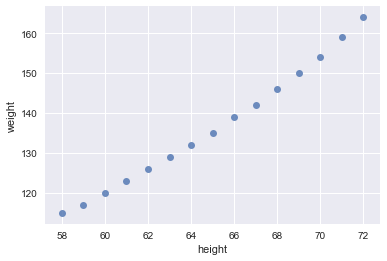

In [73]:
sns.regplot(womenDF.height, womenDF.weight, fit_reg=False)

1. SLR with weight

In [109]:
lm_women = smf.ols('height ~ weight', data=womenDF).fit()
print(lm_women.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1433.
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           1.09e-14
Time:                        21:38:31   Log-Likelihood:                -7.8974
No. Observations:                  15   AIC:                             19.79
Df Residuals:                      13   BIC:                             21.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.7235      1.044     24.645      0.0

1.61056353439e-14


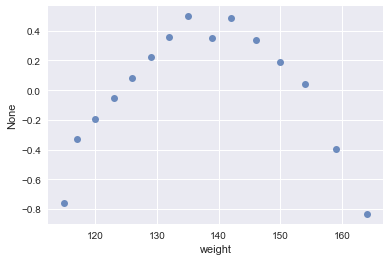

In [110]:
print(np.mean(lm_women.resid))
sns.regplot(womenDF.weight, lm_women.resid, fit_reg=False)

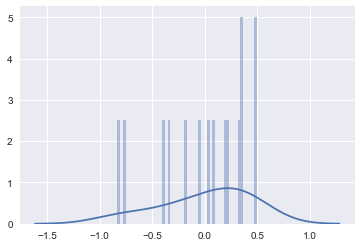

In [111]:
sns.distplot(lm_women.resid, bins=50)

In [112]:
weight_md = np.median(womenDF.weight)
import scipy as sp
sample_1 = lm_women.resid[womenDF.weight <= weight_md]
sample_2 = lm_women.resid[womenDF.weight > weight_md]
sp.stats.levene(sample_1, sample_2, center = 'median')

LeveneResult(statistic=0.027027894781622232, pvalue=0.87194365822732234)

2.MLR with $weight$ and $weight^2$

In [113]:
lm_women= smf.ols('height ~ weight + np.square(weight)', data=womenDF).fit()
print(lm_women.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.732e+04
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           1.12e-22
Time:                        21:38:33   Log-Likelihood:                 19.943
No. Observations:                  15   AIC:                            -33.89
Df Residuals:                      12   BIC:                            -31.76
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -11.7469      1.72

-5.30964901676e-12


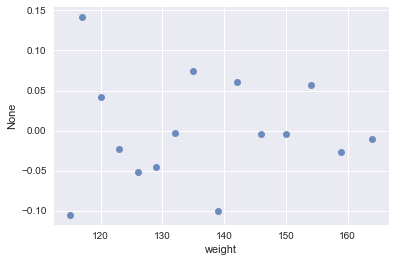

In [114]:
print(np.mean(lm_women.resid))
sns.regplot(womenDF.weight, lm_women.resid, fit_reg=False)

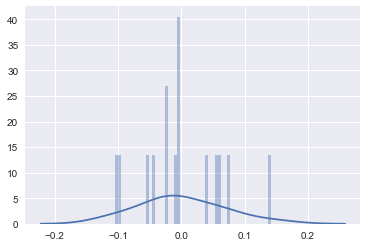

In [115]:
sns.distplot(lm_women.resid, bins=50)

In [116]:
sample_1 = lm_women.resid[womenDF.weight <= weight_md]
sample_2 = lm_women.resid[womenDF.weight > weight_md]
sp.stats.levene(sample_1, sample_2, center = 'median')

LeveneResult(statistic=1.0954297327104709, pvalue=0.31434202304418885)

3.MLR with $weight$, $weight^2$, and $weight^3$

In [117]:
lm_women= smf.ols('height ~ weight + np.square(weight) + np.power(weight, 3)', data=womenDF).fit()
print(lm_women.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.690e+04
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           2.00e-20
Time:                        21:38:41   Log-Likelihood:                 20.035
No. Observations:                  15   AIC:                            -32.07
Df Residuals:                      11   BIC:                            -29.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -4.8121    

-2.82305734345e-10


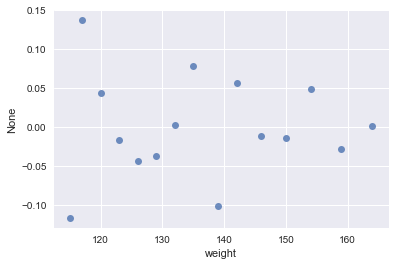

In [118]:
print(np.mean(lm_women.resid))
sns.regplot(womenDF.weight, lm_women.resid, fit_reg=False)

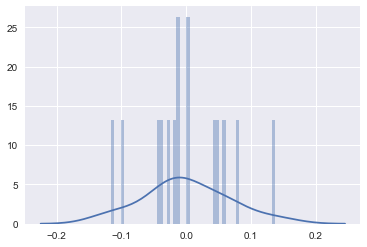

In [119]:
sns.distplot(lm_women.resid, bins=50)

In [120]:
sample_1 = lm_women.resid[womenDF.weight <= weight_md]
sample_2 = lm_women.resid[womenDF.weight > weight_md]
sp.stats.levene(sample_1, sample_2, center = 'median')

LeveneResult(statistic=1.1323355146914733, pvalue=0.30664448426157631)

### Question 13

What is the difference between a *reinforcement* and *interference* interaction effect. Provide an eample of each.

**Answer:** An reinforcement interaction effect means the coefficient of the interaction term is positive. The effect of the independent variables is strengthened after interacting with one another.

An interference interaction effect means the coefficient of the interaction term is negative. The effect of the independent variables is weakened. after interacting with one another.

For example, when regressing height on weight for people 18-64. As weight increases, the height also does so. Now if we code men-1 and women-0, then interact weight with gender and run a regression of height on weight, gender and weight x gender. The coefficient of weight x gender is likely to be positive. On the other hand, if we code women-0 and men-1 and run the same regression, the coefficient of weight x gender could be negative.

### Question 14

Import `advertising.csv`. Fit the best possible regression model using interaction and/or polynomials regressors, if appropriate. Provide an intuition as to why the significant regressors are contextually relevant.

**Answer:** Regression with $TV + Radio + TV^2$ gives us the highest adjusted $R^2$. TV and Radio are still the most effective means of advertising. Regression lm_ad and lm_ad_2 include $Newspaper$, but the coefficient of $Newspaper$ is insignificant. lm_ad_5 is a complicated regression with all single terms having significant coefficients. Also, when combining TV ad with radio ad, there is a postive effect on sales. However, when doing TV and newspaper ad together, the effect on sales is negative.

In [122]:
ad = pd.read_csv('advertising.csv')
del ad['Unnamed: 0']
ad.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


/Users/jinxin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


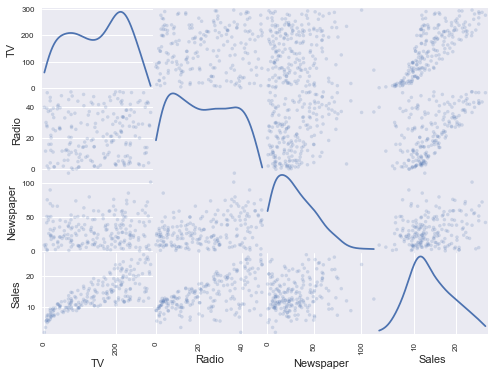

In [131]:
pd.scatter_matrix(ad, alpha=0.2, diagonal='kde', figsize=(8, 6));

In [138]:
lm_ad = smf.ols('Sales ~ Newspaper + TV + Radio', data = ad).fit()
lm_ad_2 = smf.ols('Sales ~ Newspaper + TV + Radio + np.square(TV)', data = ad).fit()
lm_ad_3 = smf.ols('Sales ~ TV + Radio', data = ad).fit()
lm_ad_4 = smf.ols('Sales ~ TV + Radio + np.square(TV)', data = ad).fit()
lm_ad_5 = smf.ols('np.log(Sales) ~ Radio + Newspaper + TV + np.square(TV) + TV * Radio + TV * Newspaper', data = ad).fit()
lm_ad_6 = smf.ols('np.log(Sales) ~ Radio + TV + np.square(TV) + TV * Radio', data = ad).fit()

In [152]:
print(lm_ad.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           1.58e-96
Time:                        22:11:30   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [150]:
print(lm_ad_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     719.0
Date:                Mon, 05 Mar 2018   Prob (F-statistic):          1.80e-105
Time:                        22:05:57   Log-Likelihood:                -365.16
No. Observations:                 200   AIC:                             738.3
Df Residuals:                     196   BIC:                             751.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2876      0.359      3.588

In [141]:
print(lm_ad_5.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(Sales)   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     302.3
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           2.84e-95
Time:                        22:04:18   Log-Likelihood:                 127.10
No. Observations:                 200   AIC:                            -240.2
Df Residuals:                     193   BIC:                            -217.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6099      0.042     38.009

### Question 15

Import `credit.csv`. Fit the best possible model you can to predict loan `balance`. Be explicit about your coding scheme for the dummy variables.  In your final model, provide insight  as to why the significant regressors are contextually relevant?

**Answer:** For student, Yes-1 and No-0. For default Yes-1 and No-0. The regression that has the highest adjusted $R^2$ is the one with $income$, $default$, and $student$. The coefficients of $default$ and $student$ are significant, meaning for people who either default or are students are have a higher loan balance, this is consistent with our common sense.

In [154]:
credit = pd.read_csv('credit.csv')
del credit['Unnamed: 0']
credit.head(5)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [191]:
lm_credit = smf.ols('balance ~ income + C(student)', data = credit).fit()
lm_credit2 = smf.ols('balance ~ income + C(default) + C(student)', data = credit).fit()
lm_credit3 = smf.ols('balance ~ income + C(default) + C(student) + C(default) * C(student)', data = credit).fit()
lm_credit4 = smf.ols('balance ~ income + C(default) + income * C(default)', data = credit).fit()
lm_credit5 = smf.ols('balance ~ income + C(default) + income * C(default)'
                     + '+ C(student) + income * C(student)', data = credit).fit()

In [192]:
print(lm_credit.summary())

                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     216.1
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           1.28e-92
Time:                        22:36:24   Log-Likelihood:                -75792.
No. Observations:               10000   AIC:                         1.516e+05
Df Residuals:                    9997   BIC:                         1.516e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           767.5623     22.35

In [193]:
print(lm_credit2.summary())

                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     630.8
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:36:24   Log-Likelihood:                -75137.
No. Observations:               10000   AIC:                         1.503e+05
Df Residuals:                    9996   BIC:                         1.503e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           748.4309     20.94

In [194]:
print(lm_credit3.summary())

                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     473.1
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:36:25   Log-Likelihood:                -75137.
No. Observations:               10000   AIC:                         1.503e+05
Df Residuals:                    9995   BIC:                         1.503e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [195]:
print(lm_credit4.summary())

                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     559.3
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:36:33   Log-Likelihood:                -75228.
No. Observations:               10000   AIC:                         1.505e+05
Df Residuals:                    9996   BIC:                         1.505e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### Question 16

Code up a backward elimination algorithm, which begins with a regression model that contains all avaiable explanatory variables in the model, and eliminates them sequentially (*one at a time*), until the $p-values$ of remaining variables are all below a threshold value, in this case, $\alpha = 0.05$.

Import `mlb_01.csv`. Regress `Salary` on all other variables except `Player`. Explicitly state the coding scheme you employ for all dummy variables. Using the abovementioned algorithm, find a purely additive regression model. Discuss and interpret the merits of this model. 

Using the model identified by the backward elimination algorithm as a baseline, begin to test polynomial and interaction terms you think may be appropriate for this model. Settle on a final model which you believe is the best possible mode you can build to pedict `Salary`.

**Answer:** 

Using pd.get_dummies, the code scheme is fairly straight-forward. Please refer to the second table below.

Regarding the algorithm:
- Merits: to remove the variable with the highest p-value in each iteration is intuitive and easy to understand. We will be able to identify what is the least useful variable.
- Drawbacks: a otherwise influential variable might have a high p-value if there is multicolinearity. As a result, we might remove potentially useful variables.
- For the final model, please see the last table.

In [315]:
mlb = pd.read_csv('mlb_01.csv')
del mlb['Player']
mlb.head(5)

,Salary,Experience,Japanese,Dominican,HR,League,Position.Name
0,5000000,4,0,0,8,National,Infielder
1,412500,0,0,0,4,American,Infielder
2,2400000,3,0,1,15,American,Infielder
3,400000,0,0,0,0,National,Infielder
4,13000000,6,1,0,9,American,Outfielder


In [316]:
mlb.columns = ['Salary', 'Experience', 'Japanese', 'Dominican', 'HR', 'League', 'PositionName']
mlb = pd.get_dummies(data=mlb, columns=['Japanese', 'Dominican', 'League', 'PositionName'], drop_first=True)
mlb.head(5)

,Salary,Experience,HR,Japanese_1,Dominican_1,League_National,PositionName_Designated Hitter,PositionName_Infielder,PositionName_Outfielder
0,5000000,4,8,0,0,1,0,1,0
1,412500,0,4,0,0,0,0,1,0
2,2400000,3,15,0,1,0,0,1,0
3,400000,0,0,0,0,1,0,1,0
4,13000000,6,9,1,0,0,0,0,1


In [239]:
mlb.columns = ['Salary', 'Experience', 'HR', 'Japanese_1', 'Dominican_1',
       'League_National', 'PositionName_Designated_Hitter',
       'PositionName_Infielder', 'PositionName_Outfielder']

In [313]:
def backward_elimination(df, response):
    # first run a regression with all variables
    df_cp = df.copy()
    
    for i in range(mlb.shape[1]):
        formula = ''
        columns = list(df_cp.columns)
        columns.remove(response)
 
        for var in columns:
            formula += '+ %s' % var 
        formula = formula[1:]
        lm_all = smf.ols('%s ~ %s' % (response, formula), data = df_cp).fit()

        # extract pvalues and remove variables with the highest p-value
        pvalue_df = pd.DataFrame(lm_all.pvalues).reset_index()
        pvalue_df.columns = ['name', 'pvalue']
        pvalue_df = pvalue_df.loc[2:, :]
        pvalue_df = pvalue_df.sort_values('pvalue', ascending=False)
        pvalue_df = pvalue_df.reset_index(drop=True)

        if pvalue_df.pvalue[0] <= 0.05:
            formula = ''
            columns = list(df_cp.columns)
            columns.remove(response)

            for var in columns:
                formula += '+ %s' % var 
            formula = formula[1:]
            lm_all = smf.ols('%s ~ %s' % (response, formula), data = df_cp).fit()
            print(lm_all.summary())
            break
        else:
            var_to_remove = pvalue_df.name[0]
            del df_cp[var_to_remove]

In [314]:
backward_elimination(mlb, 'Salary')

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     68.90
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           2.87e-36
Time:                        23:28:54   Log-Likelihood:                -3275.2
No. Observations:                 200   AIC:                             6560.
Df Residuals:                     195   BIC:                             6577.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.67

In [333]:
lm_all = smf.ols('Salary ~ Experience + HR + Japanese_1 + PositionName_Infielder + \
                 np.square(Experience) + np.square(HR)', data = mlb).fit()
print(lm_all.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     49.61
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           1.42e-36
Time:                        23:44:27   Log-Likelihood:                -3270.0
No. Observations:                 200   AIC:                             6554.
Df Residuals:                     193   BIC:                             6577.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.54